In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

# from manoFunkcijos import pout
def pout(a, limit=5):
    if len(a) > limit:
        print(f'Rodoma {limit} eilutės iš {len(a)}')
    for k,i in enumerate(a):
        if k > limit-1:
            break
        l = []
        for n in i:
            f = f'{str(n):^16.16}'
            l.append(f)
        t = f'|{k:^3}|'+'|'.join(l)+'|'
        print(t)

#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
    )
C=DB.cursor()

In [2]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""SELECT
lytis, GROUP_CONCAT(bdu_spalio) AS GC
FROM DUS2014N 
GROUP BY lytis;"""
C.execute(sql)
ans = C.fetchall()
lytis, bdusp = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 |       F        |6,6,6,13.33,10,6|
| 1 |       M        |6,11.33,6,6,6.67|


In [3]:
#  numpy fromstring
bduspII = []
for i in bdusp:
    skaiciai = np.fromstring(i, sep=',')
    bduspII.append(skaiciai)
print(bduspII)

[array([   6.,    6.,    6., ..., 3670., 4212., 4218.]), array([   6.  ,   11.33,    6.  , ..., 3246.  , 3819.67, 2324.  ])]


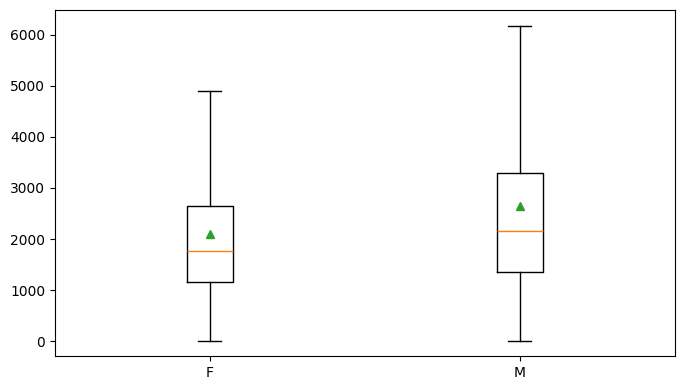

In [4]:
# boxplot:
fig, axis = plt.subplots(figsize=[8,4.5])
axis.boxplot(bduspII, showmeans=True, showfliers=False)
axis.set_xticklabels(lytis)
plt.show()

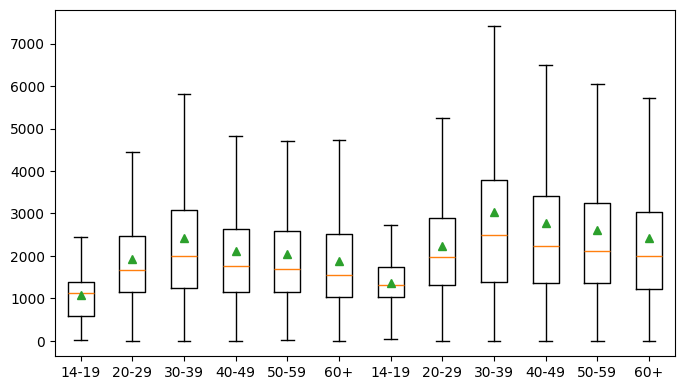

In [14]:
# 1) Parodykite su boxplot atlyginimų pasiskirstymus nuo amžiaus grupės 
# 2018 metams (vyrams ir moterims atskirai).

#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
SELECT lytis, amzius, GROUP_CONCAT(bdu_spalio) AS GC
FROM DUS2014N 
GROUP BY lytis, amzius;
"""
C.execute(sql)
ans = C.fetchall()
lytis, amzius, bdusp = list(map(list, zip(*ans)))
# pout(ans)

#  numpy fromstring
bduspII = []
for i in bdusp:
    skaiciai = np.fromstring(i, sep=',')
    bduspII.append(skaiciai)
# print(bduspII)

# boxplot:
fig, axis = plt.subplots(figsize=[8,4.5])
axis.boxplot(bduspII, showmeans=True, showfliers=False)
axis.set_xticklabels(amzius) # reikia sulieti 'lytis' ir 'amzius'.
plt.show()

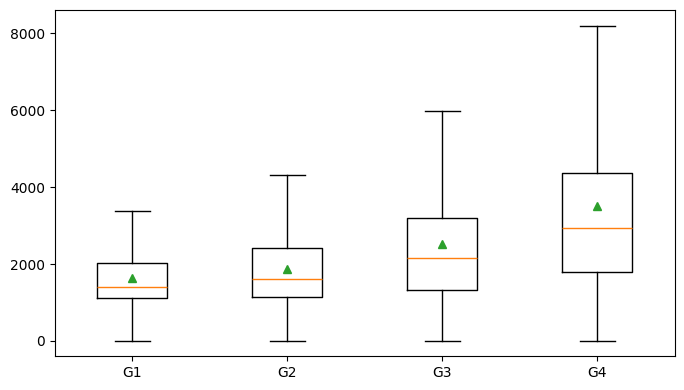

In [15]:
# 2) Taip pat parodykite su boxplot'ais atlyginimų pasiskirstymus nuo išsilavinimo, 
# 2018 metams (visiems respondentams).

#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
SELECT issilavinimas, GROUP_CONCAT(bdu_spalio) AS GC
FROM DUS2014N 
GROUP BY issilavinimas;
"""
C.execute(sql)
ans = C.fetchall()
issilavinimas, bdusp = list(map(list, zip(*ans)))
# pout(ans)

#  numpy fromstring
bduspII = []
for i in bdusp:
    skaiciai = np.fromstring(i, sep=',')
    bduspII.append(skaiciai)
# print(bduspII)

# boxplot:
fig, axis = plt.subplots(figsize=[8,4.5])
axis.boxplot(bduspII, showmeans=True, showfliers=False)
axis.set_xticklabels(issilavinimas)
plt.show()